In [1]:
import import_ipynb
import numpy as np
import os
from PIL import Image
import random

from data import downloadData as dd
from models import cnnModel as cn

importing Jupyter notebook from /root/data/downloadData.ipynb
importing Jupyter notebook from /root/models/cnnModel.ipynb


In [2]:
class MathematicalFunctionsCNN:

    train_dir = 'data/train'
    test_dir = 'data/test'
    val_dir = 'data/val'
    model = ''

    def __main__(self):
        if len(os.listdir('data')) < 4:
            dd.DataImport.importImages()
            dd.applyDataAugmentation(self.train_dir, 90)
        self.model = cn.create_Model()
        self.model.summary()
        cn.fit_model(self.model, self.train_dir, self.val_dir)
        test_images = self.get_random_test_images(3)
        cn.predict_images(test_images, self.model)

    def get_random_test_images(self, amount):
        linear_images = []
        squared_images = []
        for i in range(amount):
            random_linear_img = random.choice(os.listdir(self.test_dir + '/linear'))
            linear_images.append(self.test_dir + '/linear/' + random_linear_img)
            random_squared_img = random.choice(os.listdir(self.test_dir + '/squared'))
            squared_images.append(self.test_dir + '/squared/' + random_squared_img)
        test_images = linear_images + squared_images
        np.random.shuffle(test_images)
        return test_images

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Using TensorFlow backend.


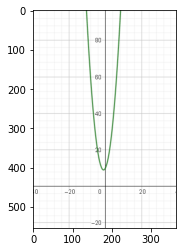

This mathematical function is linear


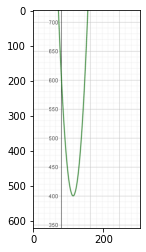

This mathematical function is squared


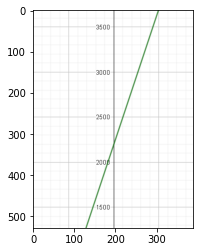

This mathematical function is linear


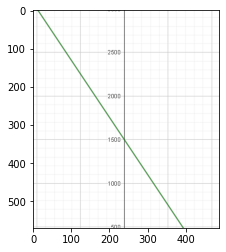

This mathematical function is squared


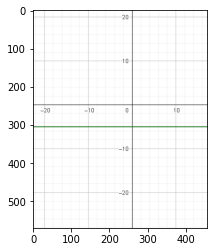

This mathematical function is linear


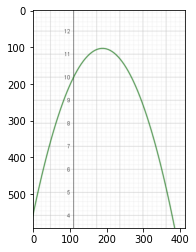

This mathematical function is squared


In [3]:
model = MathematicalFunctionsCNN()
model.__main__()